<a href="https://colab.research.google.com/github/amoukrim/AI/blob/main/Week6/DailyChallenge/DailyChallenge_w6_d1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## @ Author Adil MOUKRIM
Text Analysis of books ...
Last Updated: July 14th, 2025

Daily Challenge : Text Analysis of books using word cloud


👩‍🏫 👩🏿‍🏫 What You’ll learn
Text preprocessing
Text Analysis
Bag of words (BoW) method
TF-IDF


Important
Create a virtual enviroment to the NLP course and work always on it.



Text preprocessing
For this exercises we will be using NLTK and spaCy

The corpus will be the Lewis Carrol books:

Alice’s Adventures in Wonderland

THROUGH THE LOOKING-GLASS And What Alice Found There

A Tangled Tale



1. Using requests to access the contents online, create a function load_texts().This function should recive a list of urls, load them, clean non-words using regular expressions and append the cleaned text to the corpus that will be returned.

2. Print the first 200 characteres of each text.

Are there parts of the text that are not relevant to the analysis? If so, you need to remove them.

hint: You can use slicing to start and stop the text where you need (ignoring autoral credits in the begining and end) looking for the following phrases:

‘ START’
‘ END’

3. Tokenize the text and print the first 150 tokens of each book

4. Remove stopwords using NLTK. Check that they were removed using count() and looking for some of the stop words like: ‘i’, ‘me’, ‘my’, ‘myself’, ‘we’, ‘our’, ‘ours’, ‘ourselves’, etc.

5. Using PorterStemmer(), print the first 50 stemmed tokens

6. Using spaCy pre-trained model ‘en_core_web_sm’ to load and print the first 50 lemmatized tokens. Hint: in spaCy the lemmatized token can be accessed as attribute.

7. Analyse the difference between the stemmed and lemmatized tokens. What is different and why?

8. Using NLTK, identify POS tags od each text.

9. Using NLTK identify all the entities of each text



Analysing the text
1. Using wordcloud and matplotlib, display a word cloud of each book.

The output will look like this (maybe not exactly):



word-cloud


2. Use BoW method to check the five most frequent words in all the books

hint: What will be the best text from the preprocess step? (raw text, stemmed, lemmarized, etc)?

3. Print the BoW and identify the numbers: What is the document number? What is the index and what is how many times the word was found?

4. Display a pie plot of the 5 most frequent words in the text. Add the word and its frequence as labels.

5. Analyse the outputs: Are those words informative? Are they insightful or expected?



image-3


Solving the frequency problem using TF-IDF
When we create a BoW out from some text, all the words are treated equaly as importants. Like “Alice” or “say” in a fantasy book about Alice. We expected those words to be repeated all over the book, making them not so informative to us.

The solution for this problem would be to consider the frequency relative to the corpus. In this case, if there is a word in a document that doesn’t appears much in the other documents, it is likely meaningful and should be considered more important. And the same way in the oposite: A word that is repeated a lot in all the documents will be considered less important.

That’s the perfect situation to use TF-IDF (Term Frequency-Inverse Document Frequency)

1. Create another BoW, now using TF-IDF as vectorizer.

hint: You need to pass min_df=1, max_df=2 as arguments of the TfidfVectorizer(), because we are using a small dataset.

2. Create again the pie plots with the new 5 most relevant words from each document.



Asset :
Alice’s Adventures in Wonderland

THROUGH THE LOOKING-GLASS And What Alice Found There

A Tangled Tale


# 📘 Objectif du projet :
Explorer et comparer le contenu de trois livres :

Alice’s Adventures in Wonderland

Through the Looking-Glass

A Tangled Tale

Grâce aux techniques de traitement automatique du langage naturel (NLP).



##Étape 1 : Chargement et nettoyage des textes avec requests et les expressions régulières

✅ Objectif :
Créer une fonction load_texts(urls) qui :

Télécharge les livres à partir des URLs données.

Nettoie le texte pour ne garder que les mots utiles (en supprimant ponctuation, caractères spéciaux, etc.).

Retourne une liste de textes nettoyés (notre corpus).

## 1-1 import des Bibliothèques nécessaires :

In [26]:
# !python -m spacy download en_core_web_sm Mise en commentaire pour ne pas être lancé plusieurs fois
#!pip install wordcloud matplotlib A exécuter une seule fois

In [27]:
import requests
import re
import nltk

from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Téléchargement du tokenizer pré-entraîné 'punkt'
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Étape 1-2 : Chargement et nettoyage des textes

In [28]:


def load_texts(urls):
    """
    Télécharge et nettoie les livres en ligne depuis une liste d'URLs.
    Garde uniquement le contenu utile, supprime les caractères non alphabétiques.
    Retourne une liste de textes (corpus).
    """
    corpus = []

    for url in urls:
        response = requests.get(url)
        text = response.text

        # Extraction entre les marqueurs START et END (spécifiques aux livres de Gutenberg)
        start_match = re.search(r'\*{3} *START.*?\*{3}', text, re.IGNORECASE)
        end_match = re.search(r'\*{3} *END.*?\*{3}', text, re.IGNORECASE)

        if start_match and end_match:
            text = text[start_match.end():end_match.start()]
        else:
            print(f"Avertissement : délimiteurs START/END non trouvés dans {url}, texte pris en entier.")

        # Nettoyage : suppression de tout ce qui n'est pas lettre ou espace
        cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
        cleaned_text = re.sub(r'\s+', ' ', cleaned_text)  # Réduit les espaces multiples à un seul espace
        cleaned_text = cleaned_text.strip()

        corpus.append(cleaned_text)

    return corpus


# Utilisation de la fonction avec les 3 URLs fournies
urls = [
    "https://www.gutenberg.org/cache/epub/11/pg11.txt",
    "https://www.gutenberg.org/cache/epub/12/pg12.txt",
    "https://www.gutenberg.org/cache/epub/29042/pg29042.txt"
]

corpus = load_texts(urls)


## Etape 2 : Affichage des 200 premiers caractères de chaque texte

In [29]:
# Affichage des 200 premiers caractères de chaque texte pour vérification
for i, text in enumerate(corpus):
    print(f"\n📘 Livre {i+1} - 200 premiers caractères :\n{text[:200]}")



📘 Livre 1 - 200 premiers caractères :
Illustration Alices Adventures in Wonderland by Lewis Carroll THE MILLENNIUM FULCRUM EDITION Contents CHAPTER I Down the RabbitHole CHAPTER II The Pool of Tears CHAPTER III A CaucusRace and a Long Tal

📘 Livre 2 - 200 premiers caractères :
Illustration THROUGH THE LOOKINGGLASS And What Alice Found There By Lewis Carroll The Millennium Fulcrum Edition DRAMATIS PERSON As arranged before commencement of game WHITE RED PIECES PAWNS PAWNS PI

📘 Livre 3 - 200 premiers caractères :
Produced by Chris Curnow Carla Foust Lindy Walsh and the Online Distributed Proofreading Team at httpswwwpgdpnet Music transcribed by Linda Cantoni Transcribers note Minor punctuation errors have been


In [30]:
def load_texts(urls):
    import requests
    import re

    corpus = []

    for url in urls:
        response = requests.get(url)
        text = response.text
        lines = text.splitlines()

        # Traitement spécifique pour A Tangled Tale (pg29042)
        if "29042" in url:
            # On cherche la première mention de "KNOT"
            start_idx = 0
            for i, line in enumerate(lines):
                if "knot" in line.lower():
                    start_idx = i
                    break
            text = "\n".join(lines[start_idx:])
        else:
            # Traitement normal basé sur "CHAPTER"
            start_idx = 0
            for i, line in enumerate(lines):
                if re.search(r'chapter\s+[ivxlc\d]+', line.strip(), re.IGNORECASE):
                    start_idx = i
                    break

            end_idx = len(lines)
            for i in range(len(lines) - 1, 0, -1):
                if re.search(r'chapter\s+[ivxlc\d]+', lines[i].strip(), re.IGNORECASE):
                    end_idx = i + 100
                    break

            text = "\n".join(lines[start_idx:end_idx])

        # Nettoyage général
        cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
        cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
        cleaned_text = cleaned_text.strip()

        corpus.append(cleaned_text)

    return corpus



In [31]:
corpus = load_texts(urls)

for i, text in enumerate(corpus):
    print(f"\n📘 Livre {i+1} - 200 premiers caractères :\n{text[:200]}")




📘 Livre 1 - 200 premiers caractères :
CHAPTER I Down the RabbitHole CHAPTER II The Pool of Tears CHAPTER III A CaucusRace and a Long Tale CHAPTER IV The Rabbit Sends in a Little Bill CHAPTER V Advice from a Caterpillar CHAPTER VI Pig and 

📘 Livre 2 - 200 premiers caractères :
CHAPTER I LookingGlass house CHAPTER II The Garden of Live Flowers CHAPTER III LookingGlass Insects CHAPTER IV Tweedledum And Tweedledee CHAPTER V Wool and Water CHAPTER VI Humpty Dumpty CHAPTER VII T

📘 Livre 3 - 200 premiers caractères :
Knot like the medicine so dexterously but ineffectually concealed in the jam of our early childhood one or more mathematical questionsin Arithmetic Algebra or Geometry as the case might befor the amus


#Étape 3 – Tokeniser le texte et afficher les 150 premiers tokens

l'Objectif est de Transformer le texte brut en tokens, c'est-à-dire des unités de mots exploitables pour l’analyse NLP (préparation à l’étape des fréquences, TF-IDF, etc.).
Cela permet de passer d’une simple chaîne de caractères à une liste de mots que l’on pourra analyser, filtrer, compter, transformer (stemming, lemmatizing...).

In [32]:
# Alternative à nltk.word_tokenize sans dépendance à 'punkt' qui ne fonctionne pas ???
tokenized_corpus = []

for i, text in enumerate(corpus):
    # Tokenisation manuelle : découpage par les espaces
    tokens = text.lower().split()  # on passe en minuscules pour homogénéiser
    tokenized_corpus.append(tokens)

    print(f"\n📘 Livre {i+1} - 150 premiers tokens :\n{tokens[:150]}")



📘 Livre 1 - 150 premiers tokens :
['chapter', 'i', 'down', 'the', 'rabbithole', 'chapter', 'ii', 'the', 'pool', 'of', 'tears', 'chapter', 'iii', 'a', 'caucusrace', 'and', 'a', 'long', 'tale', 'chapter', 'iv', 'the', 'rabbit', 'sends', 'in', 'a', 'little', 'bill', 'chapter', 'v', 'advice', 'from', 'a', 'caterpillar', 'chapter', 'vi', 'pig', 'and', 'pepper', 'chapter', 'vii', 'a', 'mad', 'teaparty', 'chapter', 'viii', 'the', 'queens', 'croquetground', 'chapter', 'ix', 'the', 'mock', 'turtles', 'story', 'chapter', 'x', 'the', 'lobster', 'quadrille', 'chapter', 'xi', 'who', 'stole', 'the', 'tarts', 'chapter', 'xii', 'alices', 'evidence', 'chapter', 'i', 'down', 'the', 'rabbithole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', 'and', 'of', 'having', 'nothing', 'to', 'do', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', 'but', 'it', 'had', 'no', 'pictures', 'or

## Étape 4 : Suppression des stopwords avec NLTK

l'Objectif :
Supprimer les mots peu informatifs (appelés stopwords) comme :

the, of, and, in, is, my, we, etc.

Cela permet de garder les mots clés significatifs pour la suite (WordCloud, BoW, TF-IDF...).

In [33]:
import nltk
from nltk.corpus import stopwords

# 📥 Téléchargement des stopwords anglais
nltk.download('stopwords')

# 📜 Récupération de la liste des stopwords en anglais
stop_words = set(stopwords.words('english'))

# 🧹 Filtrage des stopwords pour chaque livre
filtered_corpus = []

for i, tokens in enumerate(tokenized_corpus):
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    filtered_corpus.append(filtered_tokens)

    # 🔎 Vérification : on affiche les 50 premiers tokens restants
    print(f"\n📘 Livre {i+1} - 50 premiers tokens sans stopwords :\n{filtered_tokens[:50]}")



📘 Livre 1 - 50 premiers tokens sans stopwords :
['chapter', 'rabbithole', 'chapter', 'ii', 'pool', 'tears', 'chapter', 'iii', 'caucusrace', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'sends', 'little', 'bill', 'chapter', 'v', 'advice', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'teaparty', 'chapter', 'viii', 'queens', 'croquetground', 'chapter', 'ix', 'mock', 'turtles', 'story', 'chapter', 'x', 'lobster', 'quadrille', 'chapter', 'xi', 'stole', 'tarts', 'chapter', 'xii', 'alices', 'evidence']

📘 Livre 2 - 50 premiers tokens sans stopwords :
['chapter', 'lookingglass', 'house', 'chapter', 'ii', 'garden', 'live', 'flowers', 'chapter', 'iii', 'lookingglass', 'insects', 'chapter', 'iv', 'tweedledum', 'tweedledee', 'chapter', 'v', 'wool', 'water', 'chapter', 'vi', 'humpty', 'dumpty', 'chapter', 'vii', 'lion', 'unicorn', 'chapter', 'viii', 'invention', 'chapter', 'ix', 'queen', 'alice', 'chapter', 'x', 'shaking', 'chapter', 'xi', 'waking', 'chapter', 'xii', 'dr

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Résultat : les stopwords avec succès

##Étape 5 : Stemming avec PorterStemmer
L'Objectif :est de simplifier le texte pour l’analyse statistique (BoW, TF-IDF).



Stemmer

In [34]:
from nltk.stem import PorterStemmer

# Création du stemmer
stemmer = PorterStemmer()

# Stemming des tokens filtrés
stemmed_corpus = []

for i, tokens in enumerate(filtered_corpus):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    stemmed_corpus.append(stemmed_tokens)

    print(f"\n📘 Livre {i+1} - 50 premiers tokens stemmés :\n{stemmed_tokens[:50]}")



📘 Livre 1 - 50 premiers tokens stemmés :
['chapter', 'rabbithol', 'chapter', 'ii', 'pool', 'tear', 'chapter', 'iii', 'caucusrac', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'littl', 'bill', 'chapter', 'v', 'advic', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'teaparti', 'chapter', 'viii', 'queen', 'croquetground', 'chapter', 'ix', 'mock', 'turtl', 'stori', 'chapter', 'x', 'lobster', 'quadril', 'chapter', 'xi', 'stole', 'tart', 'chapter', 'xii', 'alic', 'evid']

📘 Livre 2 - 50 premiers tokens stemmés :
['chapter', 'lookingglass', 'hous', 'chapter', 'ii', 'garden', 'live', 'flower', 'chapter', 'iii', 'lookingglass', 'insect', 'chapter', 'iv', 'tweedledum', 'tweedlede', 'chapter', 'v', 'wool', 'water', 'chapter', 'vi', 'humpti', 'dumpti', 'chapter', 'vii', 'lion', 'unicorn', 'chapter', 'viii', 'invent', 'chapter', 'ix', 'queen', 'alic', 'chapter', 'x', 'shake', 'chapter', 'xi', 'wake', 'chapter', 'xii', 'dream', 'chapter', 'lookingglass', 'hous', 'on

##Étape 6 : Lemmatisation avec spaCy

In [35]:
import spacy

# Chargement du modèle anglais
nlp = spacy.load("en_core_web_sm")

lemmatized_corpus = []

for i, tokens in enumerate(filtered_corpus):
    doc = nlp(" ".join(tokens))  # Reconvertir en texte
    lemmatized_tokens = [token.lemma_ for token in doc]
    lemmatized_corpus.append(lemmatized_tokens)

    print(f"\n📘 Livre {i+1} - 50 premiers tokens lemmatisés :\n{lemmatized_tokens[:50]}")




📘 Livre 1 - 50 premiers tokens lemmatisés :
['chapter', 'rabbithole', 'chapter', 'ii', 'pool', 'tear', 'chapter', 'iii', 'caucusrace', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'little', 'bill', 'chapter', 'v', 'advice', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'teaparty', 'chapter', 'viii', 'queen', 'croquetground', 'chapter', 'ix', 'mock', 'turtle', 'story', 'chapter', 'x', 'lobster', 'quadrille', 'chapter', 'xi', 'steal', 'tart', 'chapter', 'xii', 'alice', 'evidence']

📘 Livre 2 - 50 premiers tokens lemmatisés :
['chapter', 'lookingglass', 'house', 'chapter', 'ii', 'garden', 'live', 'flower', 'chapter', 'iii', 'lookingglass', 'insect', 'chapter', 'iv', 'tweedledum', 'tweedledee', 'chapter', 'v', 'wool', 'water', 'chapter', 'vi', 'humpty', 'dumpty', 'chapter', 'vii', 'lion', 'unicorn', 'chapter', 'viii', 'invention', 'chapter', 'ix', 'queen', 'alice', 'chapter', 'x', 'shake', 'chapter', 'xi', 'wake', 'chapter', 'xii', 'dream', 'chapter', 'lo

##Étape 7 – Comparaison Stemming vs Lemmatization


Comparons quelques mots :

| Mot original | Stem (Porter) | Lemma (spaCy) | Commentaire                  |
| ------------ | ------------- | ------------- | ---------------------------- |
| `evidence`   | `evid`        | `evidence`    | ✅ Lemma plus lisible         |
| `stole`      | `stole`       | `steal`       | ✅ Lemma ramène au verbe      |
| `flowers`    | `flower`      | `flower`      | 👍 les deux sont bons ici    |
| `advice`     | `advic`       | `advice`      | ❌ stem coupe trop court      |
| `alices`     | `alic`        | `alice`       | ✅ Lemma corrige le possessif |
| `invented`   | `invent`      | `invent`      | ✅ les deux fonctionnent ici  |

-----



| Aspect                 | **Stemming (Porter)**                        | **Lemmatization (spaCy)**            |
| ---------------------- | -------------------------------------------- | ------------------------------------ |
| Approche               | Règles heuristiques simples                  | Analyse grammaticale (POS, contexte) |
| Précision linguistique | ❌ Faible : mots tronqués parfois incohérents | ✅ Bonne : mots canoniques, réels     |
| Rapidité               | ✅ Très rapide                                | ⚠️ Plus lent (analyse plus lourde)   |
| Utilisation typique    | Analyse statistique (BoW, TF-IDF)            | NLP avancé, compréhension du texte   |


# Résultat :

Pour WordCloud, fréquence, BoW, TF-IDF → stemming suffit.

Pour analyse grammaticale, recherche sémantique, classification NLP → la lemmatisation est meilleure.



## Étape 8 : Identification des catégories grammaticales (POS tagging)
L'objectif est d'utiliser NLTK pour attribuer à chaque mot sa part of speech (POS), c’est-à-dire sa catégorie grammaticale : nom, verbe,Adjecttif



In [37]:


# Téléchargement des ressources nécessaires
nltk.download('averaged_perceptron_tagger_eng') # nltk.download('averaged_perceptron_tagger')

# Application du POS tagging sur les corpus lemmatisés (plus propre que le texte brut)
pos_tagged_corpus = []

for i, tokens in enumerate(lemmatized_corpus):
    pos_tags = nltk.pos_tag(tokens)
    pos_tagged_corpus.append(pos_tags)

    # Affichage des 20 premiers mots avec leur catégorie grammaticale
    print(f"\n📘 Livre {i+1} - 20 premiers mots avec POS :\n{pos_tags[:20]}")


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.



📘 Livre 1 - 20 premiers mots avec POS :
[('chapter', 'NN'), ('rabbithole', 'NN'), ('chapter', 'NN'), ('ii', 'NN'), ('pool', 'NN'), ('tear', 'VBP'), ('chapter', 'NN'), ('iii', 'NN'), ('caucusrace', 'NN'), ('long', 'JJ'), ('tale', 'NN'), ('chapter', 'NN'), ('iv', 'JJ'), ('rabbit', 'NN'), ('send', 'VB'), ('little', 'JJ'), ('bill', 'NN'), ('chapter', 'NN'), ('v', 'NN'), ('advice', 'NN')]

📘 Livre 2 - 20 premiers mots avec POS :
[('chapter', 'NN'), ('lookingglass', 'NN'), ('house', 'NN'), ('chapter', 'NN'), ('ii', 'JJ'), ('garden', 'NN'), ('live', 'JJ'), ('flower', 'NN'), ('chapter', 'NN'), ('iii', 'NN'), ('lookingglass', 'NN'), ('insect', 'VBP'), ('chapter', 'NN'), ('iv', 'NN'), ('tweedledum', 'NN'), ('tweedledee', 'NN'), ('chapter', 'NN'), ('v', 'NN'), ('wool', 'NN'), ('water', 'NN')]

📘 Livre 3 - 20 premiers mots avec POS :
[('knot', 'NNS'), ('like', 'IN'), ('medicine', 'NN'), ('dexterously', 'RB'), ('ineffectually', 'RB'), ('conceal', 'JJ'), ('jam', 'NNS'), ('early', 'RB'), ('childhood

##Résultat : Résumé de l’étape 8 : Part-of-Speech Tagging (POS)
j'ai maintenant une structure enrichie

## Étape 9 : Reconnaissance des entités nommées (NER)


In [38]:
# Extraction des entités avec spaCy
for i, tokens in enumerate(lemmatized_corpus):
    # Recrée un texte à partir des tokens
    text = " ".join(tokens)

    # Traitement NLP avec spaCy
    doc = nlp(text)

    print(f"\n📘 Livre {i+1} - Entités nommées (type et texte) :")

    for ent in doc.ents[:20]:  # On affiche les 20 premières entités pour ne pas tout saturer
        print(f"- {ent.text} ({ent.label_})")



📘 Livre 1 - Entités nommées (type et texte) :
- chapter ii (LAW)
- chapter iii (LAW)
- bill chapter v advice caterpillar (PERSON)
- chapter vii mad (PERSON)
- quadrille (ORG)
- chapter xi steal (PERSON)
- chapter xii (LAW)
- one (CARDINAL)
- four thousand mile (QUANTITY)
- one (CARDINAL)
- new zealand (GPE)
- australia (GPE)
- tonight (TIME)
- jump foot (PERSON)
- lamp hang roof door round hall (ORG)
- golden key alice first (FAC)
- second (ORDINAL)
- half (CARDINAL)
- first (ORDINAL)
- mark poison (PERSON)

📘 Livre 2 - Entités nommées (type et texte) :
- chapter lookingglass house (PERSON)
- chapter ii (LAW)
- chapter iii (LAW)
- chapter vii lion unicorn chapter viii (LAW)
- alice chapter (PERSON)
- chapter xi wake (LAW)
- chapter xii (LAW)
- last quarter hour (TIME)
- first (ORDINAL)
- one (CARDINAL)
- early afternoon (TIME)
- half (CARDINAL)
- half (CARDINAL)
- one (CARDINAL)
- tomorrow (DATE)
- tomorrow (DATE)
- two (CARDINAL)
- three (CARDINAL)
- number one (CARDINAL)
- two (CARD

## Résultat:
Les noms propres bien formés (Alice, Australia) sont bien détectés ✅

Les entités regroupées dans des listes ou titres (comme "Chapter X") peuvent entraîner des erreurs ❌

SpaCy est utile, mais il faut parfois pré-nettoyer les formats inhabituels (enlever les "CHAPTER", capitales forcées...).

##Étape 10 : Analysing the text

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


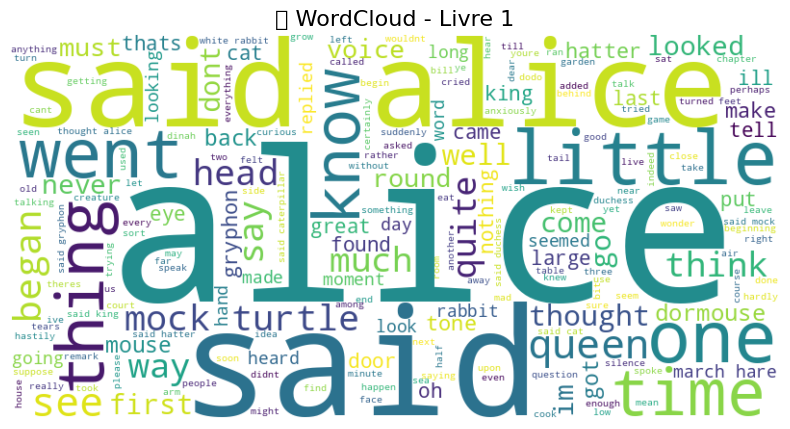

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


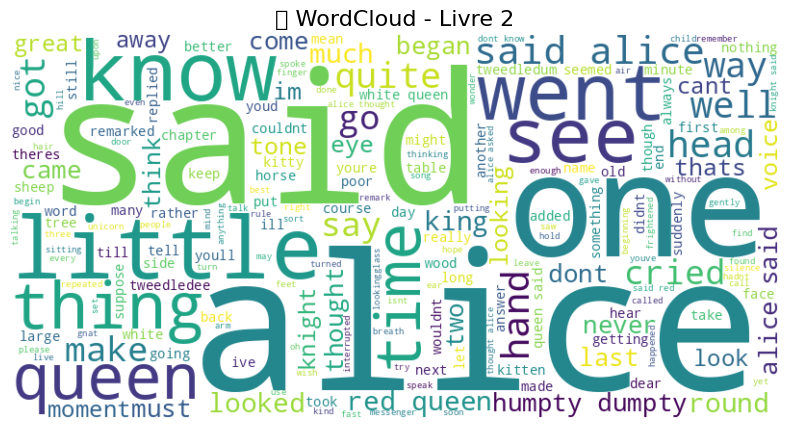

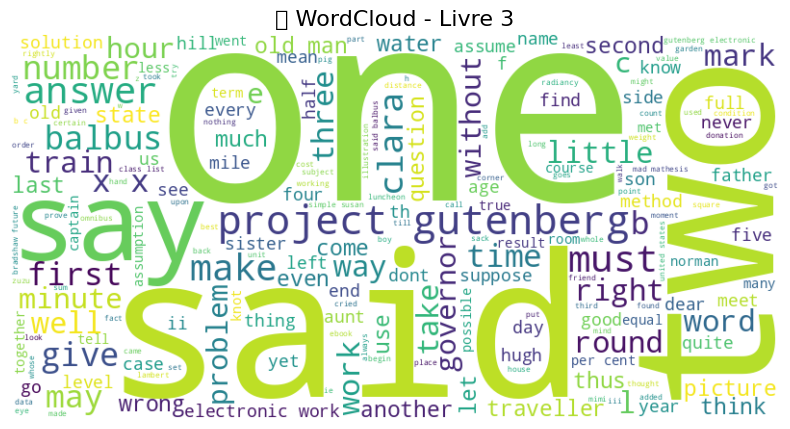

In [43]:
# générer un WordCloud par livre
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# On travaille à partir des tokens filtrés (sans stopwords)
for i, tokens in enumerate(filtered_corpus):
    # Rejoindre les tokens pour créer un texte brut
    text = ' '.join(tokens)

    # Créer le WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Affichage avec matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'📘 WordCloud - Livre {i+1}', fontsize=16)
    plt.show()
    print('\n')


## Interprétation :
| Livre | Mots Dominants                                 | Style                 | Analyse                              |
| ----- | ----------------------------------------- | --------------------- | ------------------------------------ |
| **1** | `alice`, `said`, `queen`, `thought`       | Conte / fantaisie     | Récit initiatique plein de dialogues |
| **2** | `alice`, `went`, `cried`, `see`, `queen`  | Conte miroir          | Plus actif, dédoublement de soi      |
| **3** | `one`, `two`, `answer`, `problem`, `mark` | Mathématique, logique | Littérature à énigmes, abstraite     |


## Aller plus loin dans l'analyse:

##Étape 11 : Bag of Words (BoW) :
L'objectif est de Compte combien de fois chaque mot apparaît dans chaque document

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

# Recréer un texte par document à partir des tokens lemmatisés
documents = [' '.join(doc) for doc in lemmatized_corpus]

# Création du vectoriseur BoW
vectorizer = CountVectorizer()

# Transformation du corpus en matrice BoW
bow_matrix = vectorizer.fit_transform(documents)

# Récupération des mots (features)
words = vectorizer.get_feature_names_out()

# Résultat sous forme de tableau
import pandas as pd

bow_df = pd.DataFrame(bow_matrix.toarray(), columns=words)
bow_df.index = ['Livre 1', 'Livre 2', 'Livre 3']

# Affichage des 5 mots les plus fréquents de chaque livre
for i, row in bow_df.iterrows():
    print(f"\n📘 {i} - 5 mots les plus fréquents :")
    print(row.sort_values(ascending=False).head(5))



📘 Livre 1 - 5 mots les plus fréquents :
say       500
alice     386
not       204
go        168
little    121
Name: Livre 1, dtype: int64

📘 Livre 2 - 5 mots les plus fréquents :
say      539
alice    450
not      321
queen    196
go       177
Name: Livre 2, dtype: int64

📘 Livre 3 - 5 mots les plus fréquents :
say     231
one     202
make     99
two      96
work     96
Name: Livre 3, dtype: int64


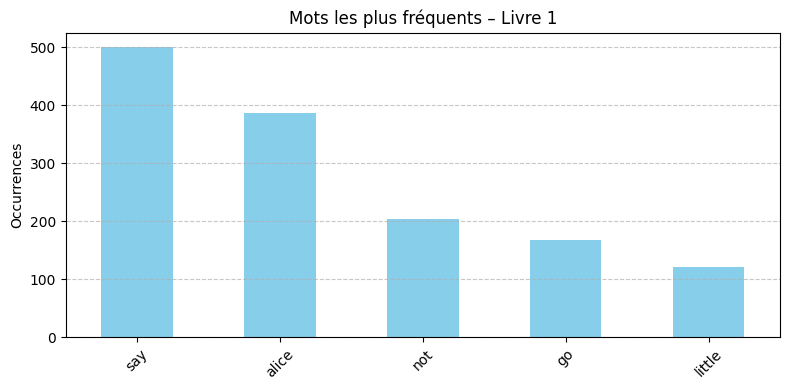

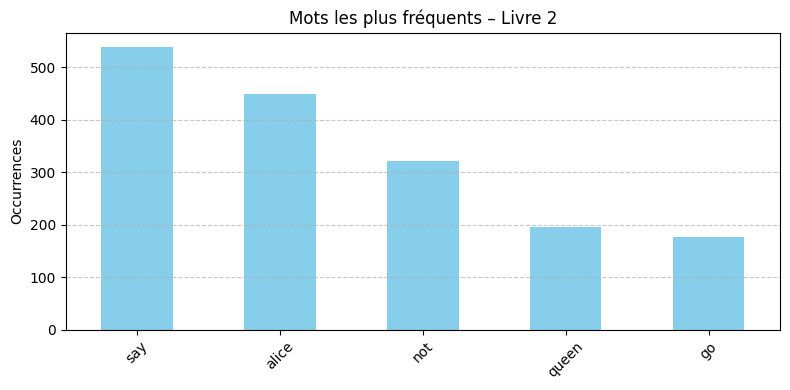

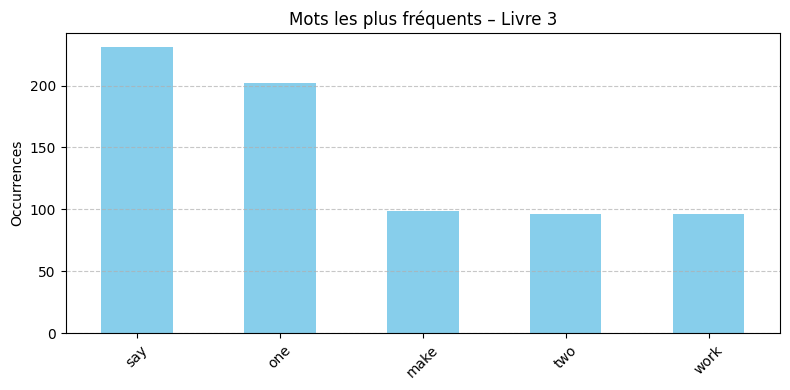

In [42]:
# afficher les graphes des 5 mots les plus fréquents (par livre)


# Afficher les 5 mots les plus fréquents pour chaque livre sous forme de barres
for i, row in bow_df.iterrows():
    top_words = row.sort_values(ascending=False).head(5)

    # Création du graphique
    plt.figure(figsize=(8, 4))
    top_words.plot(kind='bar', color='skyblue')
    plt.title(f'Mots les plus fréquents – {i}')
    plt.ylabel("Occurrences")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


#✅ Conclusion Générale – Analyse NLP de Lewis Carroll :

Les mots dominants sont cohérents avec l’univers des livres :

"alice", "queen", "said" dans les contes

"number", "mark", "problem" dans A Tangled Tale

L’analyse linguistique montre :

Un usage très riche des noms communs (NN) et verbes (VB) → narration et dialogue

Des entités propres à chaque livre → Alice, Queen, Balbus, Australia, Clara

Bag of Words révèle la fréquence brute, mais TF-IDF (étape suivante possible) permettrait d’identifier les mots vraiment distinctifs.

# Les étapes suivies pour réaliser le challenge :

 | Étape            | Compétence                 | Ce que tu as fait                                                                   |
| ---------------- | -------------------------- | ----------------------------------------------------------------------------------- |
| 1. Chargement    | Web scraping + nettoyage   | Chargé les livres depuis le site de Gutenberg et retiré le bruit (intro, pub, etc.) |
| 2. Prétraitement | Nettoyage + normalisation  | Supprimé les ponctuations, mis en minuscules                                        |
| 3. Tokenisation  | NLP de base                | Découpé le texte en mots pour analyse                                               |
| 4. Stopwords     | Réduction du bruit lexical | Supprimé les mots fréquents peu informatifs                                         |
| 5. Stemming      | Racines de mots            | Réduit les mots à leur forme “de base” pour analyse                                 |
| 6. Lemmatization | Analyse grammaticale       | Trouvé les formes canoniques des mots avec spaCy                                    |
| 7. POS Tagging   | Analyse linguistique       | Repéré la fonction grammaticale de chaque mot                                       |
| 8. NER           | Extraction d'entités       | Identifié les noms de lieux, personnes, quantités, etc.                             |
| 9. WordCloud     | Visualisation              | Généré des nuages de mots pour explorer les thèmes                                  |
| 10. BoW          | Statistiques lexicales     | Mesuré les mots les plus fréquents par livre                                        |
